In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np

import dataset for training 


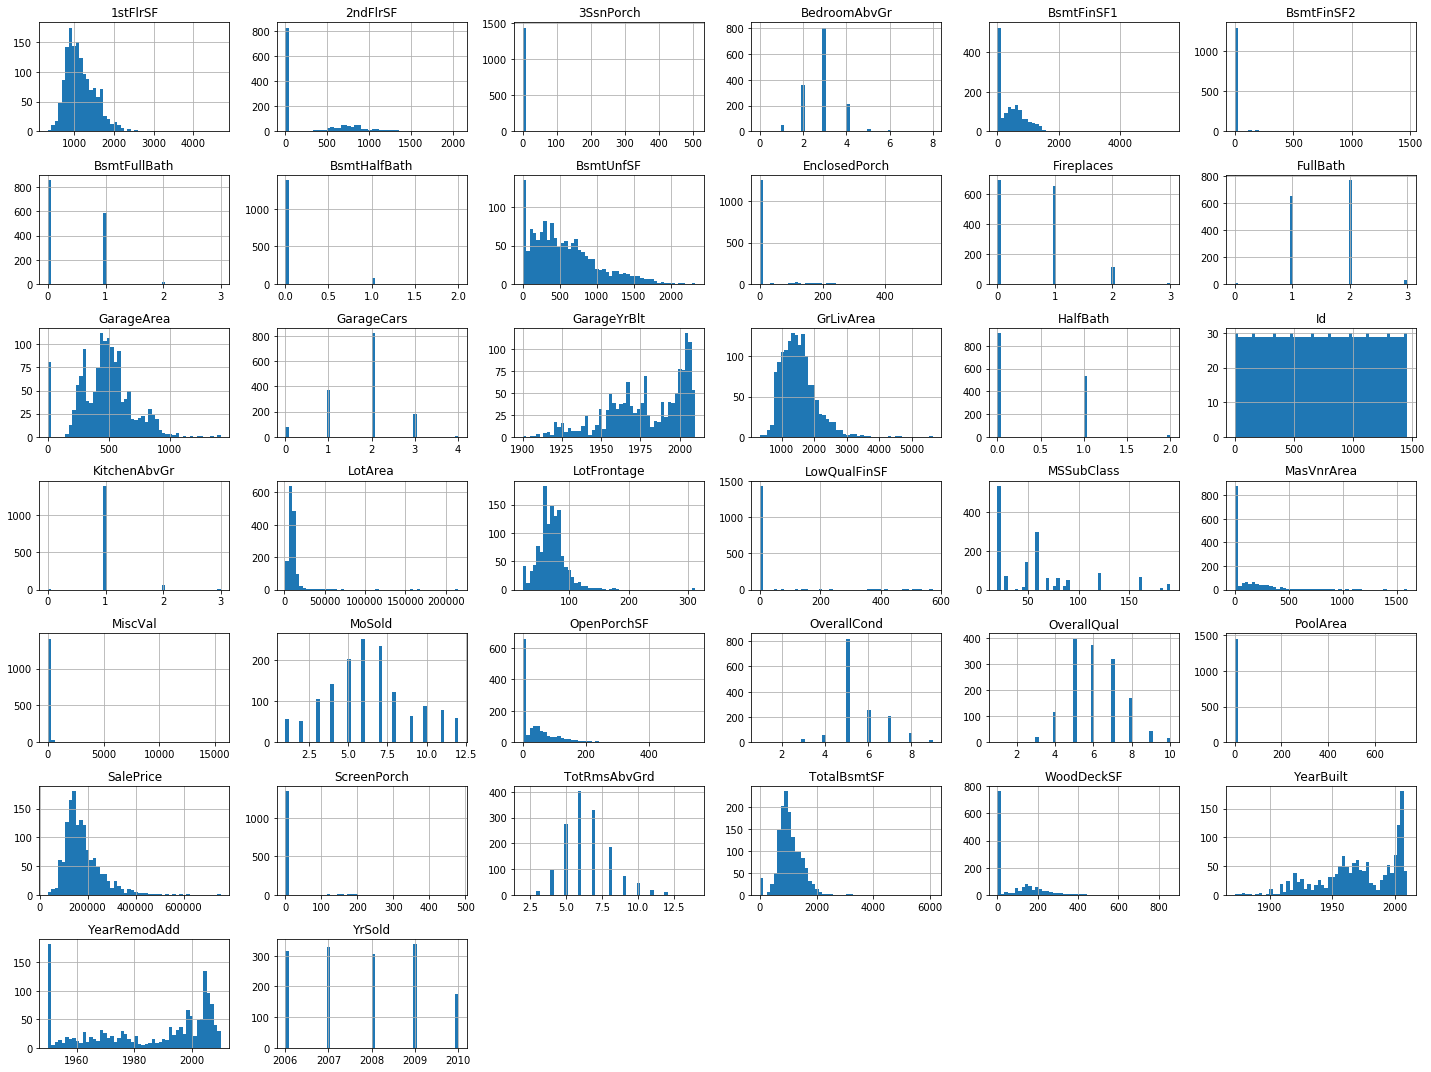

In [2]:
train_file_path = 'input/train.csv'
house_whole_data = pd.read_csv(train_file_path)
house_whole_data.hist(bins = 50, figsize = (20,15))
plt.tight_layout()
plt.show()



In [3]:
# split dataset
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (house_whole_data, test_size = 0.2, random_state = 42)
house_data = train_set.copy()

In [4]:
# go through all the features, check for those that are not listed on histogram

house_data.info()
# columns to clean
#  object: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig,LandSlope, Neighborhood,Condition1,Condition2,BldgType, HouseStyle,RoofStyle,RoofMatl,Exterior1st,
#        Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1,BsmtFinType2   
#        Heating, CentralAir, Electrical,KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, PavedDrive 
#        PoolQC, Fence, MiscFeature
#  Missing Data: LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType2,Electrical,FireplaceQu,
#               GarageType,GarageYrBlt,GarageFinish, GarageQual,GarageCond, PoolQC ,Fence, MiscFeature, SaleType, SaleCondition
#  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 81 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      951 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            74 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


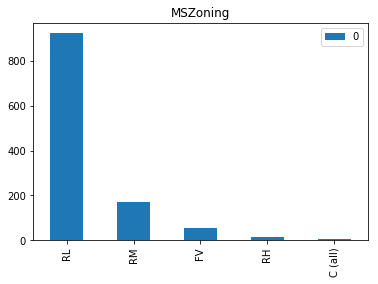

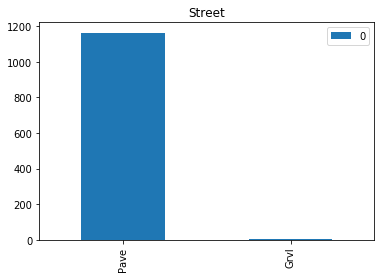

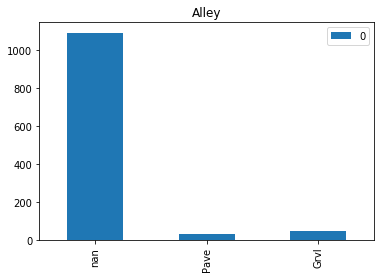

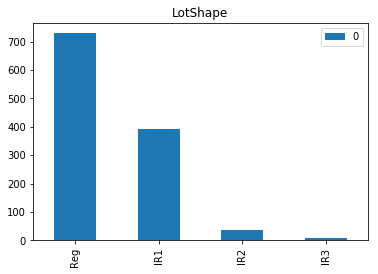

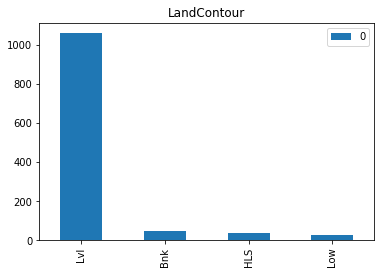

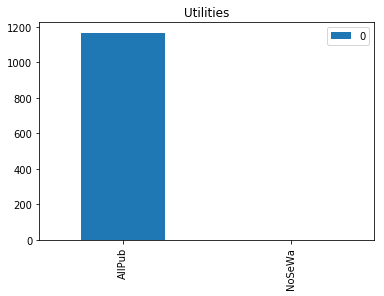

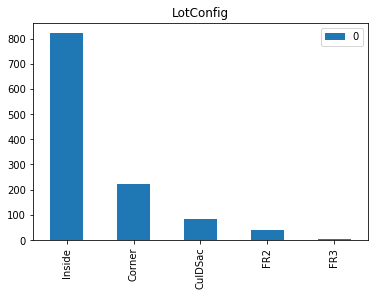

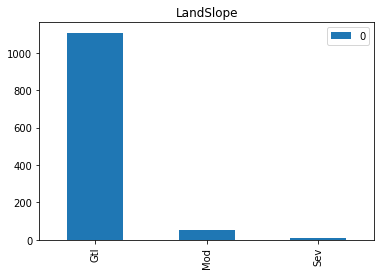

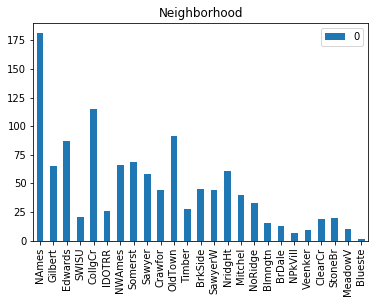

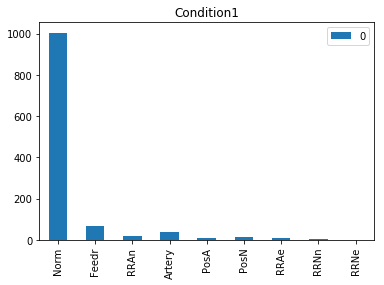

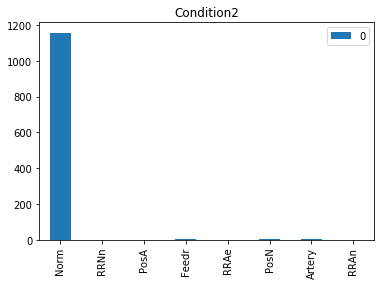

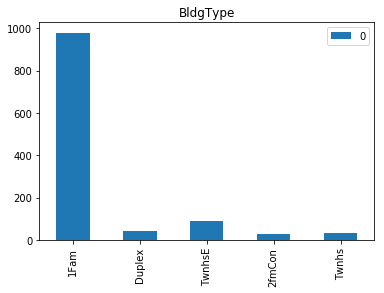

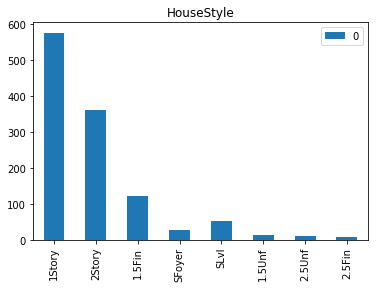

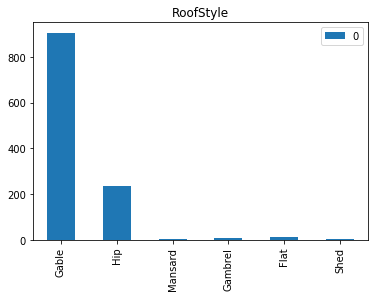

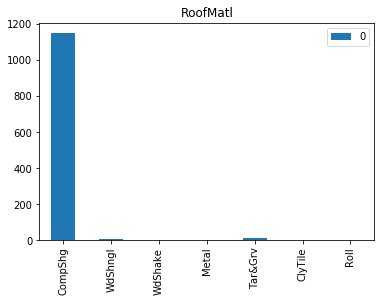

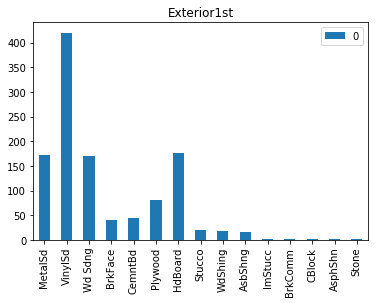

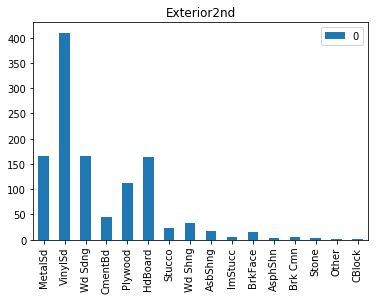

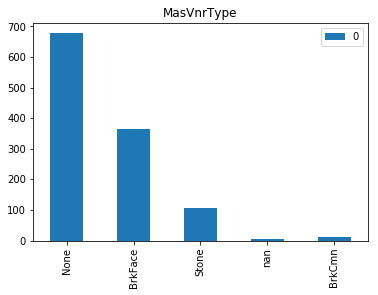

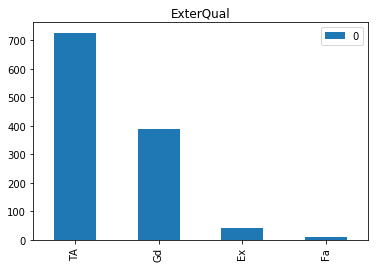

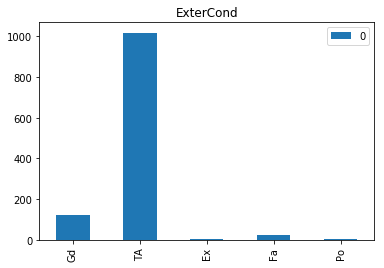

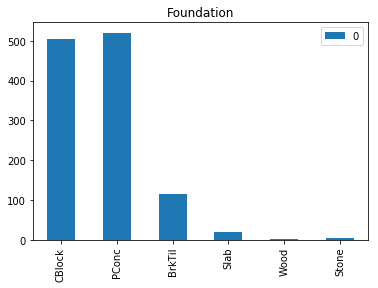

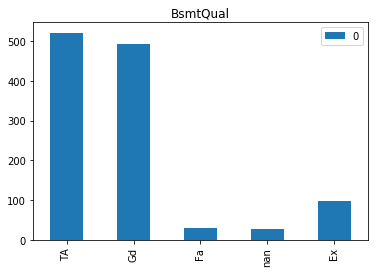

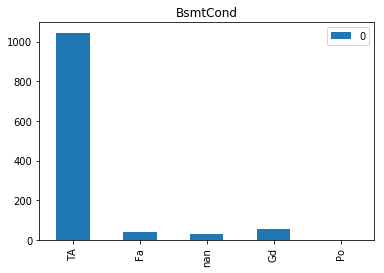

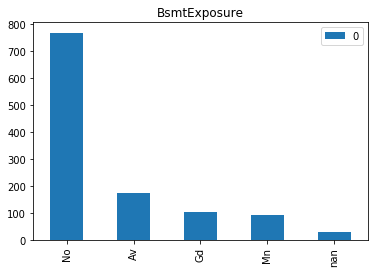

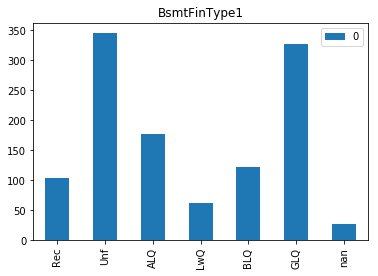

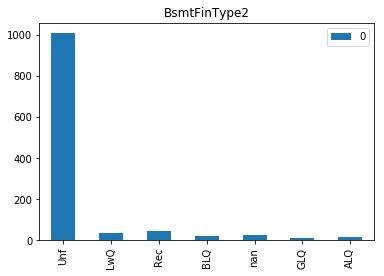

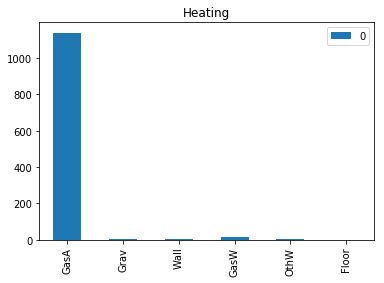

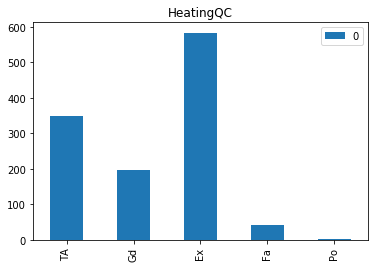

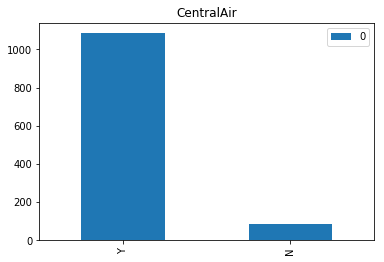

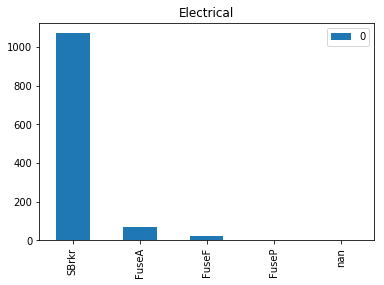

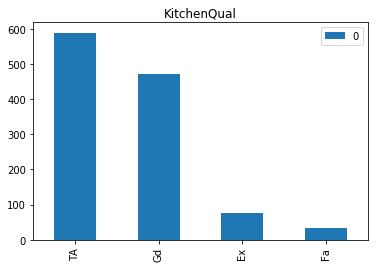

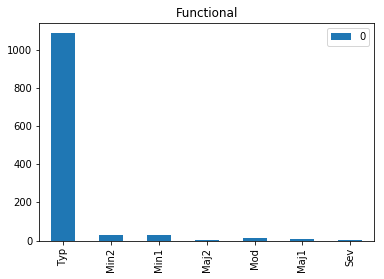

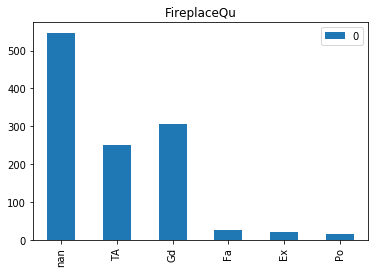

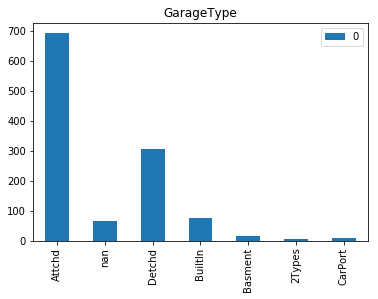

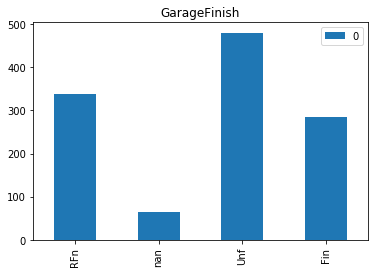

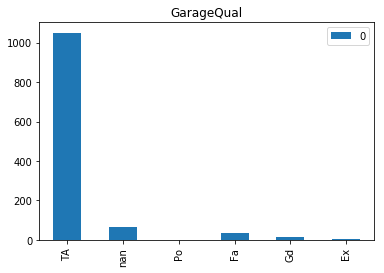

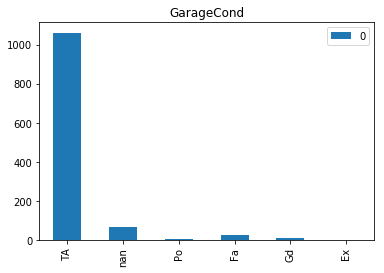

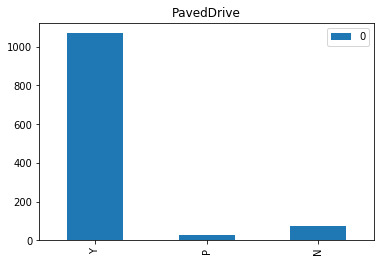

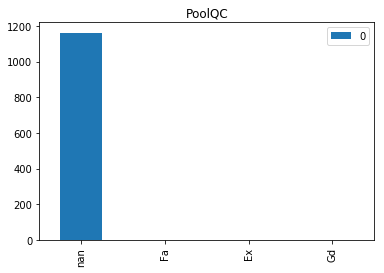

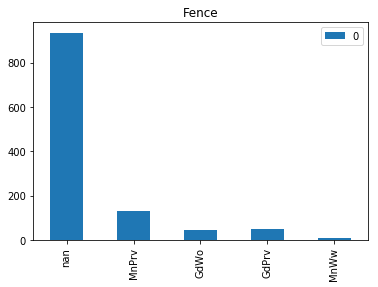

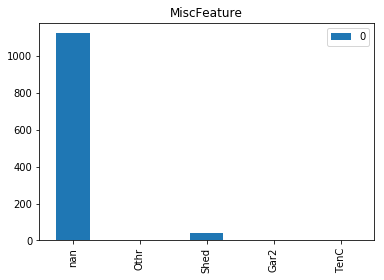

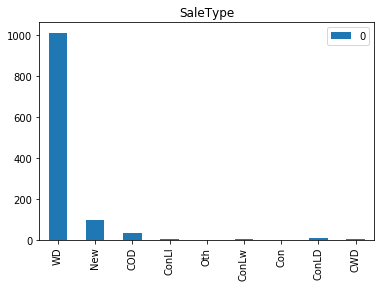

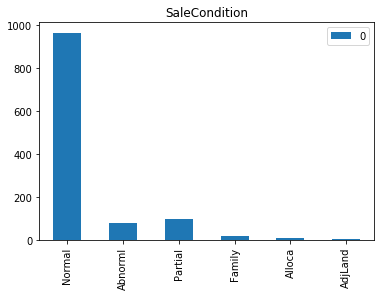

In [5]:
# write the function to plot objects feature

from collections import Counter

def plot_Objects(X, name):
    letter_counts = Counter(X)
    df = pd.DataFrame.from_dict(letter_counts, orient = 'index')
    df.plot(kind = 'bar', title = name)
    
for _eachFeature in house_data:
    if house_data[_eachFeature].dtype == object:
        plot_Objects(house_data[_eachFeature], _eachFeature)

In [15]:
#input median values for missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
# they are object type, we could drop them for this step
ready_to_encode_arr = ["MSZoning", "Street","LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood","Condition1","Condition2","BldgType", "HouseStyle","RoofStyle","RoofMatl","Exterior1st",
       "Exterior2nd","ExterQual", "ExterCond", "Foundation", "BsmtFinType1","Heating", "CentralAir", "KitchenQual", "Functional",  "PavedDrive",
        "Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","HeatingQC","Electrical","FireplaceQu",
        "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"
       ]

append_arr = ["Id", "MSZoning", "Street","LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood","Condition1","Condition2","BldgType", "HouseStyle","RoofStyle","RoofMatl","Exterior1st",
       "Exterior2nd","ExterQual", "ExterCond", "Foundation", "BsmtFinType1","Heating", "CentralAir", "KitchenQual", "Functional",  "PavedDrive",
        "Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","HeatingQC","Electrical","FireplaceQu",
        "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"
       ]
#only reserve the numerical features 
house_imput = house_data.drop(ready_to_encode_arr, axis = 1)
imputer.fit(house_imput)
X =imputer.transform(house_imput)
house_train = pd.DataFrame(X, columns = house_imput.columns, dtype=np.int64)

#now we have completed numerical data fields in house_train dataframe, we wanna merge it back with the remaining object columns
house_object = pd.DataFrame(house_data, columns = append_arr)

# new this house_new table has all the numerical data field filled, the rest are the same as the original dataset
house_new = pd.concat([house_train,house_object], axis=1,join_axes=[house_train.Index])
house_new.info()





AttributeError: 'DataFrame' object has no attribute 'Index'

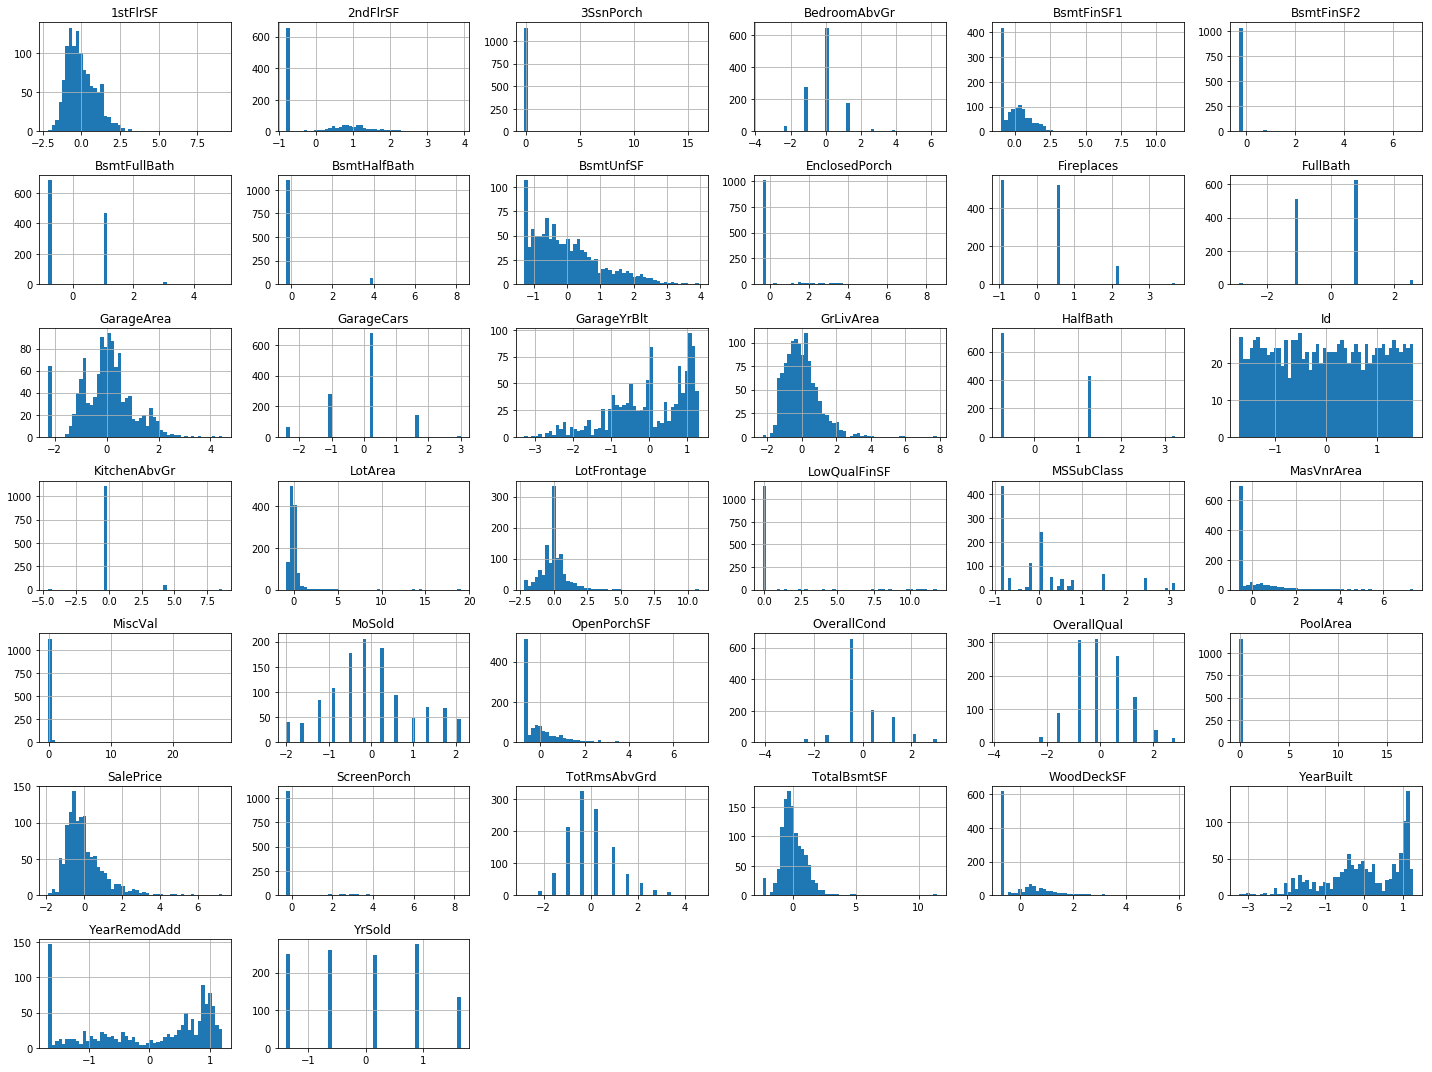

In [6]:
#standarize numerical data

def Standarize_data(X):
    mean = X.mean()
    stdev = float(X.std())
    return (X-mean)/stdev

for _eachFeature in house_new:
    if (house_new[_eachFeature].dtype) != object:
        house_new[_eachFeature] = Standarize_data(house_new[_eachFeature])

house_new.hist(bins = 50, figsize = (20,15)) 
plt.tight_layout()
plt.show()      


In [7]:

# use pandas functionality to do one hot encoding to the house_data
# notice we make the assumption to give all the null values 0 as default, this could be tuning in the future
house_final = pd.get_dummies(house_new)
# confirm there is no null value
house_final.isnull().sum()

#house_final.describe()

# sklearn does not seem to work as nice as panda here, commented out
# from sklearn.preprocessing import OneHotEncoder
# def encode_feature(feature_name):
#     encoder = OneHotEncoder()
#     feature_toEncode = house_data[feature_name]
#     encoded_feature, encoded_categories = feature_toEncode.factorize()
#     feature_cat_1hot = encoder.fit_transform(encoded_feature.reshape(-1,1))
 

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
                        ..
GarageQual_TA            0
GarageCond_Ex            0
GarageCond_Fa            0
GarageCond_Gd            0
GarageCond_Po            0
GarageCond_TA            0
P

# now all the data should be filled, end of data cleaning process for our base line

In [9]:
# we wanna see the correlation matrix for each feature, this should give us some generic ideas
corr_matrix = house_final.corr()
corr_matrix["SalePrice"].sort_values(ascending = False)

SalePrice               1.000000
OverallQual             0.785555
GrLivArea               0.695652
GarageCars              0.640991
GarageArea              0.624139
TotalBsmtSF             0.597766
1stFlrSF                0.587883
FullBath                0.552546
TotRmsAbvGrd            0.520388
YearBuilt               0.516501
YearRemodAdd            0.508593
GarageYrBlt             0.459810
MasVnrArea              0.457608
Fireplaces              0.457549
BsmtFinSF1              0.359460
WoodDeckSF              0.329843
2ndFlrSF                0.314030
LotFrontage             0.312157
OpenPorchSF             0.299969
HalfBath                0.280481
LotArea                 0.266204
BsmtFullBath            0.226346
BsmtUnfSF               0.222487
BedroomAbvGr            0.156211
ScreenPorch             0.119172
PoolArea                0.115630
Fence_MnWw              0.100347
PoolQC_Ex               0.092267
Electrical_FuseA        0.088117
SaleType_COD            0.077663
          

now oberserve the data above 
for the baseline, we might wanna discard several extreme features, such as
3ScnPorch, BsmtFinSF2 ...etc